## Linear Regression

##### In this section we will talking, discussing and implementing Linear Regression algorithm. Linear Regression is the most popular and simpliest algorithm in machine learning. The goals of Linear Regression to predict some value with your machine learning model using Linear model. Linear Regression can be trained in many different ways also you can measuring the accuracy of Linear Regression prediction value using many different metrics accuracy. I am try to discover all of them in this notebokk section. 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data

##### Now let's see what data I use to model the Linear Regression. I use Fish dataset to make prediction value using Linear Regression Model. The goal of Linear regression model to predict fish weight based on Height, length, and species parameter.


In [2]:
fish_data = pd.read_csv('Fish.csv')
fish_data.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
fish_data.shape

(159, 7)

In [4]:
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


##### This dataset has contains 159 rows that have unique address attribute and 7 columns. 
##### The data contains the following columns:

    1. Species': name of the every fish species.
    2. Weight' : weight of fish in Gram g
    3. Length1': vertical length in cm
    4. Length2': diagonal length in cm
    5. Length3': cross length in cm
    6. Height : height in cm
    7. Width': diagonal width in cm


# EDA (Exploratory Data Analysis)

#### Let's Making some Visualize Data 

C:\Users\Ivander\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  if __name__ == '__main__':


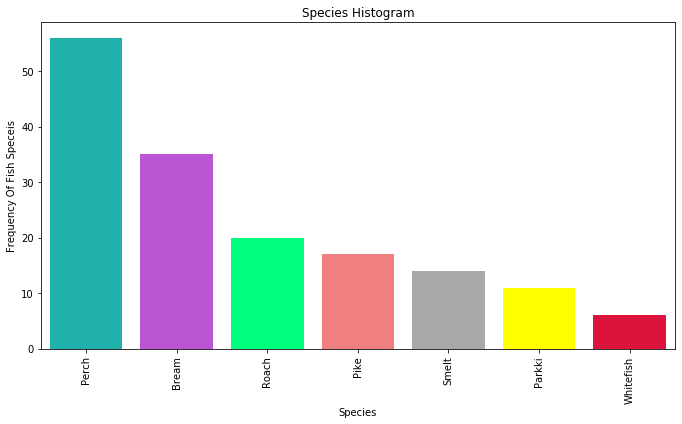

In [5]:
## Species Visualize Data

plt.figure(figsize=(25,6))

labels = fish_data.Species.unique()
values = fish_data.Species.value_counts()

plt.subplot(1,2,1)
plt1 = fish_data.Species.value_counts().plot('bar') 
plt.title('Species Histogram')
plt1.set(xlabel = 'Species', ylabel='Frequency Of Fish Speceis')
plt1.bar(labels, values, color=['lightseagreen', 'mediumorchid', 'springgreen', 'lightcoral', 'darkgrey','yellow','crimson'])

plt.show()

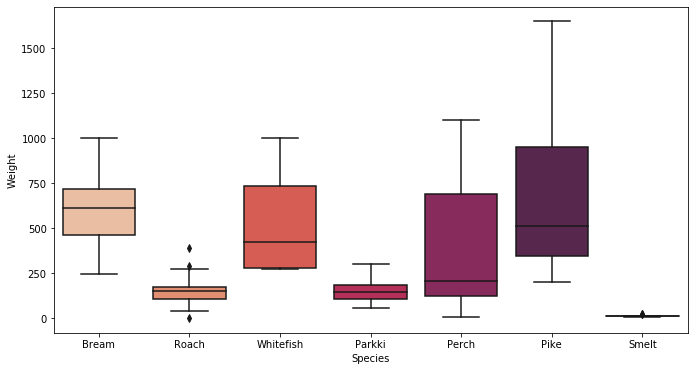

In [6]:
## Species Vs Prices Visualitation data

plt.figure(figsize=(25,6))
plt.title('Width Vs Species')
plt.subplot(1,2,1)
sns.boxplot(x=fish_data.Species, y=fish_data.Weight, palette=("rocket_r"))


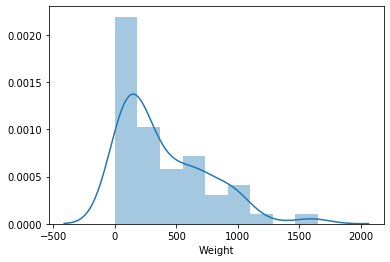

In [7]:
sns.distplot(fish_data['Weight'])

In [8]:
#scatter plot length vs weight
def scatter(x, fig):
    plt.subplot(5,2,fig)
    plt.scatter(fish_data[x],fish_data['Weight'], alpha=0.6)
    plt.title(x+' Weight')
    plt.ylabel('Weight')
    plt.xlabel(x)


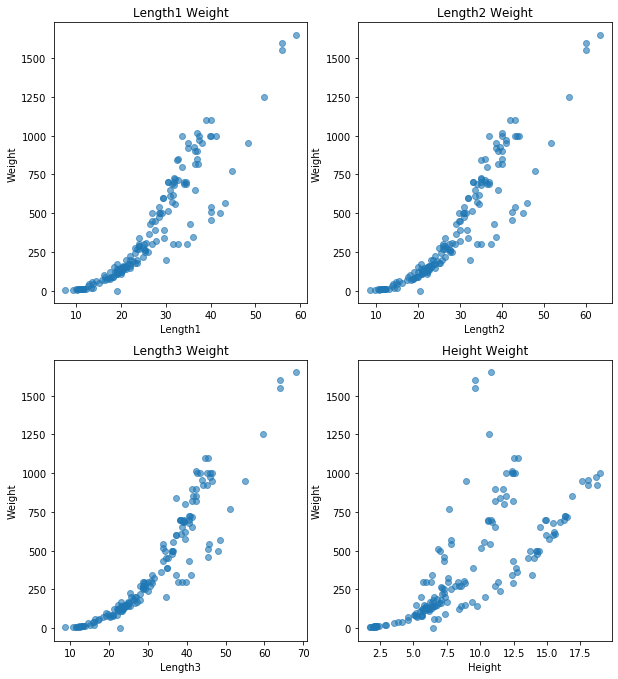

In [9]:
plt.figure(figsize=[10,30])
scatter('Length1', 1)
scatter('Length2', 2)
scatter('Length3', 3)
scatter('Height', 4)

# Training A Linear Regression Model

##### Now Let's Train our First Regression Model. Firstly we need to split up our dataset into tha X variabel that contains the feature to train our Regression Model. The features including Length1, Length2,etc. The next is Y variabel which containting the target value that we want to try predict. In this case Weight value are using as targeted values. But we will drop the "Species" Feature because "Species" feature just only had Text values that the linear Regression can't process it. 

In [10]:
X = fish_data[['Length1','Length2','Length3','Height','Width']]
y = fish_data['Weight']

# Linear Regression Model

#### Now let's make our first Linear regression model using train test split that we've made before

In [ ]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X,y)

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(X['Length1'],y, alpha=0.6)
plt.title("Prediction of Weight")
plt.xlabel("Length1")
plt.ylabel("Wight")
plt.show()

## Model Evaluation

In [ ]:
print(regression_model.intercept_)

In [ ]:
coef_data = pd.DataFrame(regression_model.coef_, X.columns,columns=['Coefficient'])
coef_data

## Prediciton From Our Model

In [ ]:
predictions = regression_model.predict(X)

# REFERENCES 

https://www.kaggle.com/faressayah/linear-regression-house-price-prediction

https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe

